In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Data Visualization

link to tableau

In [2]:
marvel_comics = pd.read_csv('marvel_comics.csv')

In [3]:
marvel_comics.head()

,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,Price
0,A Year of Marvels: April Infinite Comic (2016),(2016),A Year of Marvels: April Infinite Comic (2016) #1,"April 01, 2016",The Infinite Comic that will have everyone tal...,Yves Bigerel,Yves Bigerel,Jamal Campbell,Marvel Universe,Infinite Comic,Rated T+,Free
1,A Year of Marvels: August Infinite Comic (2016),(2016),A Year of Marvels: August Infinite Comic (2016...,"August 10, 2016","It’s August, and Nick Fury is just in time to ...",Jamal Campbell,"Chris Sims, Chad Bowers",NaN,Marvel Universe,Infinite Comic,NaN,Free
2,A Year of Marvels: February Infinite Comic (2016),(2016),A Year of Marvels: February Infinite Comic (20...,"February 10, 2016",Join us in a brand new Marvel comics adventure...,"Danilo S. Beyruth, M Mast",Ryan North,NaN,Marvel Universe,Infinite Comic,Rated T+,Free
3,A Year of Marvels: July Infinite Comic (2016),(2016),A Year of Marvels: July Infinite Comic (2016) #1,"June 29, 2016",Celebrating the Fourth of July is complicated ...,Juanan Ramirez,Chuck Wendig,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free
4,A Year of Marvels: June Infinite Comic (2016),(2016),A Year of Marvels: June Infinite Comic (2016) #1,"June 15, 2016",Sam Alexander’s finding it hard to cope with t...,Diego Olortegui,Paul Allor,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free


In [4]:
marvel_comics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34992 entries, 0 to 34991
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   comic_name         34992 non-null  object
 1   active_years       34992 non-null  object
 2   issue_title        34466 non-null  object
 3   publish_date       34466 non-null  object
 4   issue_description  30395 non-null  object
 5   penciler           25482 non-null  object
 6   writer             27595 non-null  object
 7   cover_artist       12255 non-null  object
 8   Imprint            11684 non-null  object
 9   Format             32894 non-null  object
 10  Rating             12619 non-null  object
 11  Price              32894 non-null  object
dtypes: object(12)
memory usage: 3.2+ MB


In [5]:
marvel_comics.nunique()

comic_name            4935
active_years           412
issue_title          33757
publish_date          3317
issue_description    29331
penciler              3915
writer                3082
cover_artist          1010
Imprint                 39
Format                  11
Rating                  36
Price                   53
dtype: int64

# Summary Stats

## Exploratory Data Analysis

In [32]:

data = {
    'year': [2020, 2020, 2021, 2021, 2022, 2022],
    'product': ['A', 'B', 'A', 'B', 'A', 'B'],
    'sales_amount': [100, 200, 150, 250, 200, 300]
}

sales = pd.DataFrame(data)

# pivot_table 생성
pivot_table = sales.pivot_table(values='sales_amount', index='year', columns='product', aggfunc='sum')
print(pivot_table)


product    A    B
year             
2020     100  200
2021     150  250
2022     200  300


In [33]:
# read in marvel_movies.csv
marvel_movies = pd.read_csv('marvel_movies.csv')
marvel_movies.groupby("category").head()

,film,category,worldwide gross ($m),% budget recovered,critics % score,audience % score,audience vs critics % deviance,budget,domestic gross ($m),international gross ($m),opening weekend ($m),second weekend ($m),1st vs 2nd weekend drop off,% gross from opening weekend,% gross from domestic,% gross from international,% budget opening weekend,year,source
0,Ant-Man,Ant-Man,518,398%,83%,85%,-2%,130.0,180,338,57.0,24.0,-58%,31.8,34.7%,65.3%,43.8%,2015,https://www.the-numbers.com/movie/Ant-Man#tab=...
1,Ant-Man & The Wasp,Ant-Man,623,479%,87%,80%,7%,130.0,216,406,75.8,29.0,-62%,35.0,34.7%,65.2%,58.3%,2018,https://www.the-numbers.com/movie/Ant-Man-and-...
2,Avengers: Age of Ultron,Avengers,1395,382%,76%,82%,-6%,365.0,459,936,191.0,77.0,-60%,41.7,32.9%,67.1%,52.3%,2015,https://www.the-numbers.com/movie/Avengers-Age...
3,Avengers: End Game,Avengers,2797,699%,94%,90%,4%,400.0,858,1939,357.0,147.0,-59%,41.6,30.7%,69.3%,89.3%,2019,https://www.the-numbers.com/movie/Avengers-End...
4,Avengers: Infinity War,Avengers,2048,683%,85%,91%,-6%,300.0,678,1369,257.0,114.0,-56%,38.0,33.1%,66.8%,85.7%,2018,https://www.the-numbers.com/movie/Avengers-Inf...
5,Black Panther,Black Panther,1336,668%,96%,79%,17%,200.0,700,636,202.0,111.0,-45%,28.9,52.4%,47.6%,101.0%,2018,https://www.the-numbers.com/movie/Black-Panthe...
6,Black Panther 2,Black Panther,855,342%,84%,94%,-10%,250.0,453,401,181.0,66.0,-64%,48.6,53.0%,46.9%,72.4%,2022,https://www.the-numbers.com/movie/Black-Panthe...
7,Black Widow,Unique,379,190%,79%,80%,-1%,200.0,183,196,80.3,25.8,-68%,43.8,48.3%,51.7%,40.2%,2021,https://www.the-numbers.com/movie/Black-Widow-...
8,Captain America,Captain America,370,264%,79%,75%,4%,140.0,176,193,65.0,25.0,-62%,36.8,47.6%,52.2%,46.4%,2011,https://www.the-numbers.com/movie/Captain-Amer...
9,Captain America: Civil War,Captain America,1151,460%,90%,89%,1%,250.0,408,743,179.0,72.6,-59%,43.9,35.4%,64.6%,71.6%,2016,https://www.the-numbers.com/movie/Captain-Amer...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


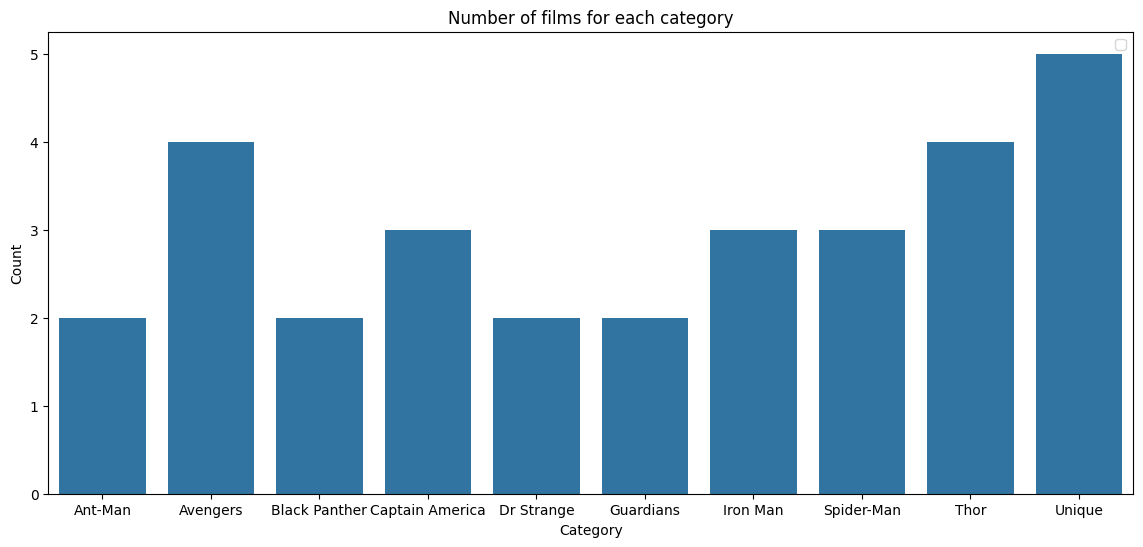

In [57]:
# how many films were made on one series of comic book
plt.figure(figsize=(14, 6))
marvel_movies.groupby("category").count()["film"]
sns.barplot(marvel_movies.groupby("category").count()["film"])

plt.title('Number of films for each category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend()
plt.show()

In [25]:
# all the % columns are listed as objects. need to convert to int 
columns_to_convert = [
    '% budget recovered',
    'critics % score',
    'audience % score',
    'audience vs critics % deviance',
    '1st vs 2nd weekend drop off',
    '% gross from domestic',
    '% gross from international',
    '% budget opening weekend'
]

for column in columns_to_convert:
    marvel_movies[column] = marvel_movies[column].apply(lambda x: int(float(str(x).replace('%', '').replace(',', ''))) if pd.notna(x) else None)

In [26]:
print(f'Rows: {marvel_movies.shape[0]}')
print(f'Columns: {marvel_movies.shape[1]}')

Rows: 30
Columns: 19


In [27]:
marvel_movies.describe()

,worldwide gross ($m),% budget recovered,critics % score,audience % score,audience vs critics % deviance,budget,domestic gross ($m),international gross ($m),opening weekend ($m),second weekend ($m),1st vs 2nd weekend drop off,% gross from opening weekend,% gross from domestic,% gross from international,% budget opening weekend,year
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,940.866667,457.033333,82.566667,82.233333,0.333333,199.283333,370.900000,569.433333,136.770000,57.390000,-57.766667,38.070000,40.766667,58.300000,66.033333,2016.266667
std,563.119068,181.228087,11.263868,11.031876,9.437027,63.656362,193.394603,387.182634,71.790822,30.440154,6.072455,5.439457,7.271500,7.358551,21.840303,4.176563
min,265.000000,190.000000,47.000000,45.000000,-26.000000,130.000000,134.000000,130.000000,55.000000,22.100000,-68.000000,23.700000,30.000000,45.000000,35.000000,2008.000000
25%,594.000000,321.750000,77.500000,76.250000,-2.750000,161.250000,218.000000,315.500000,81.475000,35.150000,-62.000000,35.000000,34.000000,52.500000,51.250000,2013.250000
50%,810.000000,432.000000,85.000000,85.500000,0.000000,183.000000,333.500000,448.500000,119.500000,48.900000,-58.000000,37.800000,40.000000,59.000000,58.000000,2017.000000
75%,1146.250000,581.500000,91.000000,91.000000,3.000000,200.000000,422.250000,731.250000,180.500000,71.350000,-54.250000,41.925000,46.750000,65.000000,82.500000,2019.000000
max,2797.000000,956.000000,96.000000,96.000000,34.000000,400.000000,858.000000,1939.000000,357.000000,147.000000,-45.000000,48.600000,54.000000,69.000000,130.000000,2022.000000


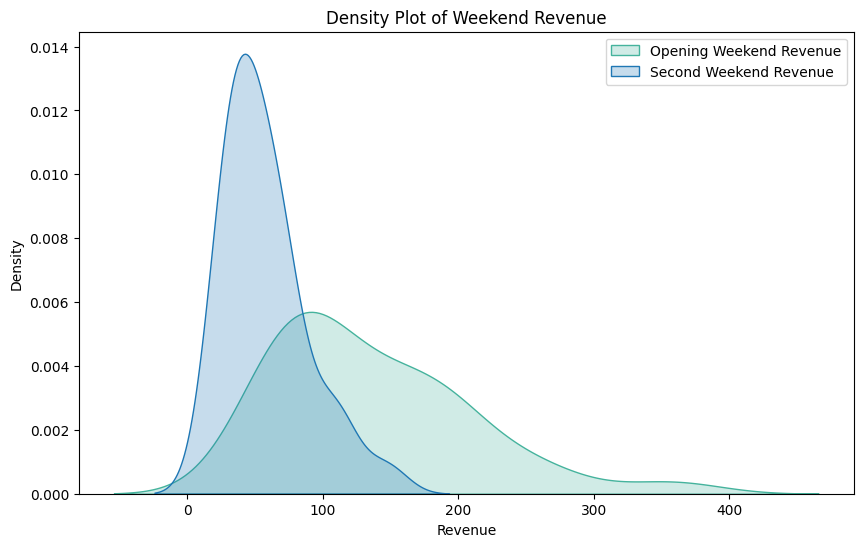

In [28]:
# weekend revenue
plt.figure(figsize=(10, 6))

# Plot the density for opening weekend revenue
sns.kdeplot(marvel_movies['opening weekend ($m)'], fill=True, label='Opening Weekend Revenue', color = '#45b39d')

# Overlay the density for second weekend revenue
sns.kdeplot(marvel_movies['second weekend ($m)'], fill=True, label='Second Weekend Revenue')

plt.title('Density Plot of Weekend Revenue')
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.legend()
plt.show()

In [12]:
# create a new column containing the exact release date
release_dates = pd.to_datetime([
    '2015-07-17', '2018-07-06', '2015-05-01', '2019-04-26', '2018-04-27', '2018-02-16',
    '2022-11-11', '2021-07-09', '2011-07-22', '2016-05-06', '2014-04-04', '2019-03-08',
    '2016-11-04', '2022-05-06', '2021-11-05', '2014-08-01', '2017-05-05', '2008-06-13',
    '2008-05-02', '2010-05-07', '2013-05-03', '2021-09-03', '2019-07-02', '2017-07-07',
    '2021-12-17', '2012-05-04', '2013-11-08', '2022-07-08', '2017-11-03', '2011-05-06'
])

# Append the 'Release Date' column to the 'marvel_movies' DataFrame
marvel_movies['release date'] = release_dates

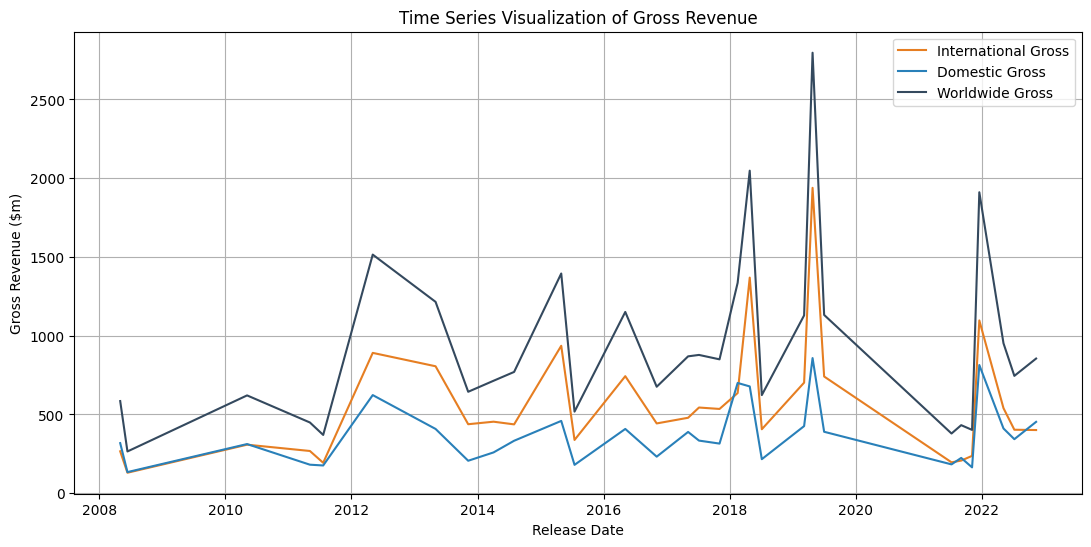

In [13]:
marvel_movies_sorted_date = marvel_movies.set_index('release date')
marvel_movies_sorted_date.sort_index(inplace=True)

# Plotting the time series for gross revenue
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(marvel_movies_sorted_date['international gross ($m)'], color='#e67e22', label='International Gross')
ax.plot(marvel_movies_sorted_date['domestic gross ($m)'], color='#2980b9', label='Domestic Gross')
ax.plot(marvel_movies_sorted_date['worldwide gross ($m)'], color='#34495e', label='Worldwide Gross')

# Adding labels and title
plt.xlabel('Release Date')
plt.ylabel('Gross Revenue ($m)')
plt.title('Time Series Visualization of Gross Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
print(marvel_movies['category'].value_counts())

category
Unique             5
Avengers           4
Thor               4
Captain America    3
Iron Man           3
Spider-Man         3
Ant-Man            2
Black Panther      2
Dr Strange         2
Guardians          2
Name: count, dtype: int64


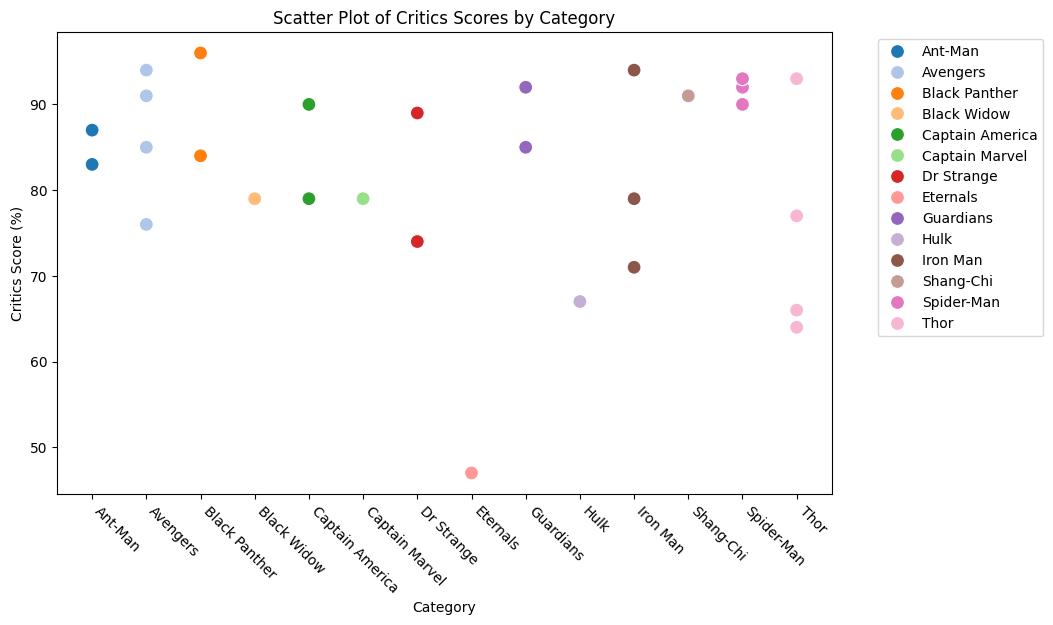

In [15]:
# fill in unique categories
marvel_movies_altcat = marvel_movies.copy()
marvel_movies_altcat.iloc[7, 1] = 'Black Widow'
marvel_movies_altcat.iloc[11, 1] = 'Captain Marvel'
marvel_movies_altcat.iloc[14, 1] = 'Eternals'
marvel_movies_altcat.iloc[17, 1] = 'Hulk'
marvel_movies_altcat.iloc[21, 1] = 'Shang-Chi'

# critics % score by category
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='category', y='critics % score', data=marvel_movies_altcat, hue='category', palette='tab20', s=100)

plt.xlabel('Category')
plt.ylabel('Critics Score (%)')
plt.title('Scatter Plot of Critics Scores by Category')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=-45, ha='left', ticks=range(len(marvel_movies_altcat['category'].unique())), 
           labels=marvel_movies_altcat['category'].unique())

# Show the plot
plt.show()

# Segmentation and Targeting

## Data Cleaning

In [44]:
# read in regional_families.csv dataset
regional_families = pd.read_csv('regional_families.csv')

In [45]:
regional_families.head()

,householdID,dietary_spec,dist_park,email_sub,est_inc,hhold_size,leisure_perc,oldest,passholder,previous_attend,social_media_scale,youngest
0,1,NaN,0.9,No,62641.584126,2,0.08,92,1,1,0.70,13
1,2,NaN,23.8,Yes,70127.969071,3,0.21,41,1,4,0.29,24
2,3,NaN,27.3,No,112130.429602,1,0.11,67,1,1,0.08,67
3,4,NaN,20.7,No,76096.440915,2,0.04,31,1,1,0.99,1
4,5,Gluten-Free,55.1,Yes,79925.089485,6,0.27,52,0,0,0.22,25


In [46]:
regional_families.drop('householdID', axis=1, inplace=True)

In [47]:
regional_families.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dietary_spec        1768 non-null   object 
 1   dist_park           8500 non-null   float64
 2   email_sub           8500 non-null   object 
 3   est_inc             8500 non-null   float64
 4   hhold_size          8500 non-null   int64  
 5   leisure_perc        8500 non-null   float64
 6   oldest              8500 non-null   int64  
 7   passholder          8500 non-null   int64  
 8   previous_attend     8500 non-null   int64  
 9   social_media_scale  8500 non-null   float64
 10  youngest            8500 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 730.6+ KB


In [48]:
# change email_sub to binary variable
regional_families['email_sub'] = regional_families['email_sub'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

## Variable Selection

In [49]:
# check for highly correlated variables to avoid redundancy
correlation_matrix = regional_families.corr()

# Custom colormap
cmap = sns.diverging_palette(20, 220, as_cmap=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0, vmin=-1, vmax=1)

plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Gluten-Free'

- to avoid redundancy and reduce dimensionality, take a subset of our dataset

In [ ]:
columns = ['dist_park', 'email_sub', 'est_inc', 'previous_attend', 'social_media_scale', 'youngest']
regional_fam_num = regional_families[columns]

## K-means Clustering

### Elbow Chart

In [ ]:
# Try different values of k (number of clusters)
sse = {}
for k in range(1, 15):
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=654) 
    
    # Fit KMeans on the normalized dataset 
    kmeans.fit(regional_fam_num) 
    sse[k] = kmeans.inertia_

sns.pointplot(x=list(sse.keys()), y=list(sse.values()));
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')

### Model Building

In [ ]:
# kmeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=654)
kmeans.fit(regional_fam_num)

### Summary Statistics for Clusters

In [50]:
cluster_labels = kmeans.labels_
regional_fam_k4 = regional_fam_num.assign(Cluster = cluster_labels)
regional_fam_k4.groupby(['Cluster']).agg({
    'dist_park' : 'mean',
    'email_sub': 'mean',
    'est_inc' : 'mean',
    'previous_attend':'mean',
    'social_media_scale':'mean',
    'youngest':['mean', 'count'],
}).round(2)

NameError: name 'kmeans' is not defined

- 3 clusters seem to cause large variations in the count

# Conjoint Analysis & Memo Section

# Forecasting Total Revenue

# Classification

# Strategic Memo

# A/B Testing

# Conclusions

In [ ]:
print("hi it's jiun") 

In [ ]:
print("lol lol")